In [4]:

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import keras
import os,glob
import datetime
import warnings
warnings.simplefilter('ignore')

In [2]:
training_path='/content/drive/MyDrive/okra disease/train'

In [4]:
disease_class=['diseased okra leaf','fresh okra leaf']

In [ ]:
##taking one diseased okra leaf image
path=os.path.join(training_path ,disease_class[0],'*')
img=glob.glob(path)
img=cv2.imread(img[3])
image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB )

Text(0.5, 1.0, 'diseased okra leaf')

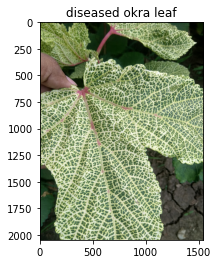

In [ ]:
plt.imshow(image)
plt.title('diseased okra leaf')

In [ ]:
##fresh okra leaf
path=os.path.join(training_path ,disease_class[1],'*')
img=glob.glob(path)
img=cv2.imread(img[2])
image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB )

Text(0.5, 1.0, 'fresh okra leaf')

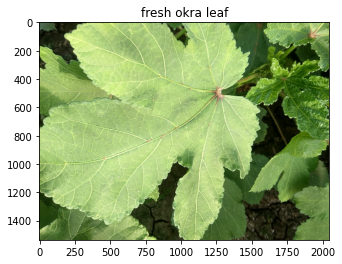

In [ ]:
plt.imshow(image)
plt.title('fresh okra leaf')

In [3]:
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

In [3]:
##without augumentation
train_datagen=ImageDataGenerator(rescale=1.0/255)

In [4]:
val_datagen=ImageDataGenerator(rescale=1.0/255)

In [6]:
folders=glob.glob('/content/drive/MyDrive/okra disease/train/*')
#len(folders)
print(f'number of output classes in training data:{len(folders)}')

number of output classes in training data:2


In [5]:
train_data=train_datagen.flow_from_directory('/content/drive/MyDrive/okra disease/train',target_size=(150,150),batch_size=32,class_mode='categorical')

Found 1587 images belonging to 2 classes.


In [10]:
train_data.class_indices

{'diseased okra leaf': 0, 'fresh okra leaf': 1}

In [ ]:
len(train_data)

50

In [ ]:
len(val_data)

9

In [6]:
val_data=val_datagen.flow_from_directory('/content/drive/MyDrive/okra disease/val',target_size=(150,150),batch_size=32,class_mode='categorical')

Found 274 images belonging to 2 classes.


In [ ]:
val_data.class_indices

{'diseased okra leaf': 0, 'fresh okra leaf': 1}

In [ ]:
##displaying randomly augumented training images
#from keras.preprocessing import image
#names=[os.path.join(r'F:\projects\okra disease\train\diseased okra leaf',fname) for fname in os.listdir(r'F:\projects\okra disease\train\diseased okra leaf')]
#img_path=fnames[3]
#img=image.load_img(img_path,target_size=(150,150))
#x=image.img_to_array(img)
#x=x.reshape((1,)+x.shape)
#i=0
#for batch in train_datagen.flow(x,batch_size=1):
 #   plt.figure(i)
  #  imgplot=plt.imshow(image.array_to_img(batch[0]))
   # i+=1
    #if i%4==0:
     #   break
      #  plt.show()


In [4]:
from keras import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from keras.callbacks import ModelCheckpoint

In [8]:
##model1
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dense(2,activation='softmax'))
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 256)       2

In [9]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [10]:

checkpoint = ModelCheckpoint(filepath='/content/drive/MyDrive/okra disease/model.{epoch:02d}-{val_accuracy:.2f}.h5', monitor='val_accuracy', verbose=1, save_best_only=True)

In [11]:
history=model.fit(train_data,validation_data=val_data,steps_per_epoch=len(train_data),validation_steps=len(val_data),epochs=25,callbacks=[checkpoint])

Epoch 1/25
50/50 [==============================] - 188s 3s/step - loss: 0.7824 - accuracy: 0.6034 - val_loss: 0.3138 - val_accuracy: 0.9124

Epoch 00001: val_accuracy improved from -inf to 0.91241, saving model to /content/drive/MyDrive/okra disease/model.01-0.91.h5
Epoch 2/25
50/50 [==============================] - 166s 3s/step - loss: 0.4649 - accuracy: 0.7721 - val_loss: 0.4084 - val_accuracy: 0.8066

Epoch 00002: val_accuracy did not improve from 0.91241
Epoch 3/25
50/50 [==============================] - 165s 3s/step - loss: 0.3947 - accuracy: 0.8483 - val_loss: 0.2476 - val_accuracy: 0.9051

Epoch 00003: val_accuracy did not improve from 0.91241
Epoch 4/25
50/50 [==============================] - 165s 3s/step - loss: 0.2827 - accuracy: 0.8861 - val_loss: 0.1511 - val_accuracy: 0.9453

Epoch 00004: val_accuracy improved from 0.91241 to 0.94526, saving model to /content/drive/MyDrive/okra disease/model.04-0.95.h5
Epoch 5/25
50/50 [==============================] - 167s 3s/step - 

In [12]:
model.save('okra disease leaf prediction.h5')

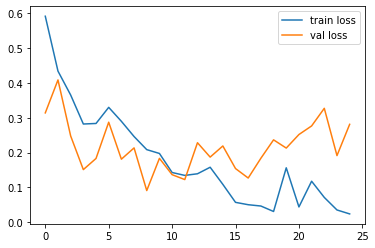

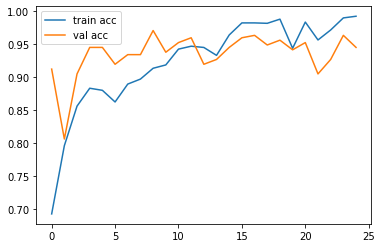

<Figure size 432x288 with 0 Axes>

In [13]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [16]:
from keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import image


In [16]:
model=load_model('/content/okra disease leaf prediction.h5')

In [17]:
test_datagen=ImageDataGenerator(rescale=1.0/255)

In [19]:
test_data=test_datagen.flow_from_directory('/content/drive/MyDrive/okra disease/test',target_size=(150,150),batch_size=32,class_mode='categorical')

Found 88 images belonging to 2 classes.


In [20]:
model.evaluate(test_data)

3/3 [==============================] - 34s 16s/step - loss: 0.7305 - accuracy: 0.8636


[0.7305160760879517, 0.8636363744735718]

In [21]:
from sklearn import metrics

In [22]:
test_generator = ImageDataGenerator(1.0/255)
test_data_generator = test_generator.flow_from_directory('/content/drive/MyDrive/okra disease/test',
     target_size=(150,150),
    batch_size=32,
    shuffle=False)
test_steps_per_epoch = np.math.ceil(test_data_generator.samples / test_data_generator.batch_size)

predictions = model.predict_generator(test_data_generator, steps=test_steps_per_epoch)
# Get most likely class
predicted_classes = np.argmax(predictions, axis=1)

Found 88 images belonging to 2 classes.


In [23]:
true_classes = test_data_generator.classes
class_labels = list(test_data_generator.class_indices.keys())   

In [24]:
from sklearn.metrics import classification_report
report = metrics.classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)    

                    precision    recall  f1-score   support

diseased okra leaf       0.51      1.00      0.68        44
   fresh okra leaf       1.00      0.05      0.09        44

          accuracy                           0.52        88
         macro avg       0.76      0.52      0.38        88
      weighted avg       0.76      0.52      0.38        88



In [26]:
metrics.confusion_matrix(true_classes, predicted_classes)

array([[44,  0],
       [42,  2]])

In [27]:
metrics.roc_auc_score(true_classes, predicted_classes)

0.5227272727272727

## Data Augumentation

In [5]:
train_datagen=ImageDataGenerator(rescale=1./255,rotation_range=20,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,fill_mode='nearest')

In [7]:
val_datagen=ImageDataGenerator(rescale=1.0/255)

In [6]:
train_data=train_datagen.flow_from_directory('/content/drive/MyDrive/okra disease/train',target_size=(150,150),batch_size=32,class_mode='categorical')

Found 1587 images belonging to 2 classes.


In [8]:
val_data=val_datagen.flow_from_directory('/content/drive/MyDrive/okra disease/val',target_size=(150,150),batch_size=32,class_mode='categorical')

Found 274 images belonging to 2 classes.


In [7]:
train_data.class_indices

{'diseased okra leaf': 0, 'fresh okra leaf': 1}

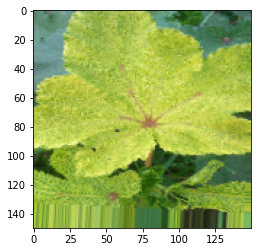

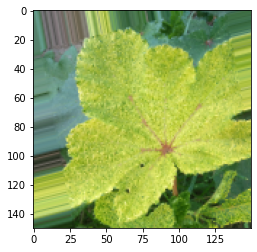

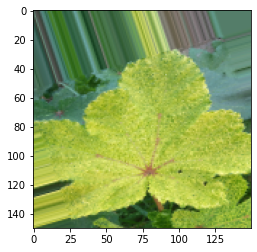

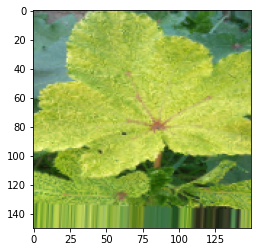

In [8]:
from keras.preprocessing import image
fnames=[os.path.join('/content/drive/MyDrive/okra disease/train/diseased okra leaf',fname) for fname in os.listdir('/content/drive/MyDrive/okra disease/train/diseased okra leaf')]
img_path=fnames[0]
img=image.load_img(img_path,target_size=(150,150))
x=image.img_to_array(img)
x=x.reshape((1,)+x.shape)
i=0
for batch in train_datagen.flow(x,batch_size=1):
    plt.figure(i)
    imgplot=plt.imshow(image.array_to_img(batch[0]))
    i+=1
    if i%4==0:
        break
        plt.show()

In [9]:
##model2
model2=Sequential()
model2.add(Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model2.add(MaxPooling2D(2,2))
model2.add(Conv2D(64,(3,3),activation='relu'))
model2.add(MaxPooling2D(2,2))
model2.add(Conv2D(128,(3,3),activation='relu'))
model2.add(MaxPooling2D(2,2))
model2.add(Conv2D(256,(3,3),activation='relu'))
model2.add(MaxPooling2D(2,2))
model2.add(Flatten())
model2.add(Dense(512,activation='relu'))
model2.add(Dense(2,activation='softmax'))
model2.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 256)       2

In [10]:
model2.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [11]:
checkpoint = ModelCheckpoint(filepath='/content/drive/MyDrive/okra disease/model.{epoch:02d}-{val_accuracy:.2f}.h5', monitor='val_accuracy', verbose=1, save_best_only=True)

In [12]:
history=model2.fit(train_data,validation_data=val_data,steps_per_epoch=len(train_data),validation_steps=len(val_data),epochs=25,callbacks=[checkpoint])

Epoch 1/25
50/50 [==============================] - 1555s 30s/step - loss: 0.6788 - accuracy: 0.5897 - val_loss: 0.5630 - val_accuracy: 0.7226

Epoch 00001: val_accuracy improved from -inf to 0.72263, saving model to /content/drive/MyDrive/okra disease/model.01-0.72.h5
Epoch 2/25
50/50 [==============================] - 189s 4s/step - loss: 0.4328 - accuracy: 0.8154 - val_loss: 0.2658 - val_accuracy: 0.9161

Epoch 00002: val_accuracy improved from 0.72263 to 0.91606, saving model to /content/drive/MyDrive/okra disease/model.02-0.92.h5
Epoch 3/25
50/50 [==============================] - 174s 3s/step - loss: 0.3873 - accuracy: 0.8246 - val_loss: 0.4647 - val_accuracy: 0.7664

Epoch 00003: val_accuracy did not improve from 0.91606
Epoch 4/25
50/50 [==============================] - 168s 3s/step - loss: 0.3304 - accuracy: 0.8659 - val_loss: 0.3864 - val_accuracy: 0.8248

Epoch 00004: val_accuracy did not improve from 0.91606
Epoch 5/25
50/50 [==============================] - 171s 3s/step 

Mounted at /content/drive


In [13]:
model2.save('okra disease leaf prediction with augumentation.h5')

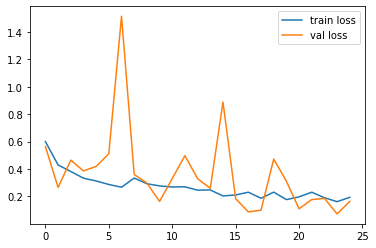

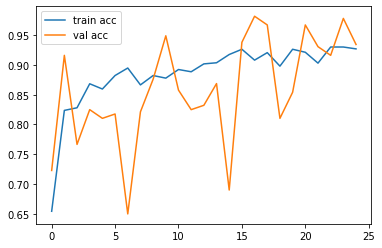

<Figure size 432x288 with 0 Axes>

In [14]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [17]:
model=load_model('/content/okra disease leaf prediction with augumentation.h5')

In [19]:
test_datagen=ImageDataGenerator(rescale=1.0/255)

In [20]:
test_data=test_datagen.flow_from_directory('/content/drive/MyDrive/okra disease/test',target_size=(150,150),batch_size=32,class_mode='categorical')

Found 88 images belonging to 2 classes.


In [22]:
from sklearn import metrics

In [23]:
test_generator = ImageDataGenerator(1.0/255)
test_data_generator = test_generator.flow_from_directory('/content/drive/MyDrive/okra disease/test',
     target_size=(150,150),
    batch_size=32,
    shuffle=False)
test_steps_per_epoch = np.math.ceil(test_data_generator.samples / test_data_generator.batch_size)

predictions = model.predict_generator(test_data_generator, steps=test_steps_per_epoch)
# Get most likely class
predicted_classes = np.argmax(predictions, axis=1)

Found 88 images belonging to 2 classes.


In [24]:
true_classes = test_data_generator.classes
class_labels = list(test_data_generator.class_indices.keys())   

In [25]:
from sklearn.metrics import classification_report
report = metrics.classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)    

                    precision    recall  f1-score   support

diseased okra leaf       0.50      1.00      0.67        44
   fresh okra leaf       0.00      0.00      0.00        44

          accuracy                           0.50        88
         macro avg       0.25      0.50      0.33        88
      weighted avg       0.25      0.50      0.33        88



In [26]:
metrics.roc_auc_score(true_classes, predicted_classes)

0.5

### Transfer Learning

In [ ]:
from keras.applications.vgg19 import VGG19
from keras import optimizers

In [ ]:
cov_base=VGG19(weights='imagenet',include_top=False,input_shape=(150,150,3))

80150528/80134624 [==============================] - 1s 0us/step


In [ ]:
cov_base.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [ ]:
model3=Sequential()
model3.add(cov_base)
model3.add(Flatten())
model3.add(Dense(512,activation='relu',))
model3.add(Dense(2,activation='softmax'))

In [ ]:
model3.compile(optimizer=optimizers.RMSprop(lr=2e-5),loss='categorical_crossentropy',metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
# don't train existing weights
for layer in cov_base.layers:
    layer.trainable = False
    

In [ ]:
history=model3.fit_generator(train_data,validation_data=val_data,epochs=25,steps_per_epoch=len(train_data),validation_steps=len(val_data))

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/25
50/50 [==============================] - 1103s 21s/step - loss: 0.6362 - accuracy: 0.6873 - val_loss: 0.2817 - val_accuracy: 0.8832
Epoch 2/25
50/50 [==============================] - 197s 4s/step - loss: 0.2495 - accuracy: 0.8911 - val_loss: 0.0891 - val_accuracy: 0.9599
Epoch 3/25
50/50 [==============================] - 182s 4s/step - loss: 0.1784 - accuracy: 0.9273 - val_loss: 0.1424 - val_accuracy: 0.9489
Epoch 4/25
50/50 [==============================] - 177s 4s/step - loss: 0.1670 - accuracy: 0.9295 - val_loss: 0.8415 - val_accuracy: 0.7920
Epoch 5/25
50/50 [==============================] - 177s 4s/step - loss: 0.1358 - accuracy: 0.9490 - val_loss: 0.0839 - val_accuracy: 0.9672
Epoch 6/25
50/50 [==============================] - 177s 4s/step - loss: 0.0960 - accuracy: 0.9659 - val_loss: 0.5670 - val_accuracy: 0.8467
Epoch 7/25
50/50 [==============================] - 176s 4s/step - loss: 0.1473 - accuracy: 0.9388 - val_loss: 0.2578 - val_accuracy: 0.9234
Epoch 8/25


In [ ]:
model3.save('vgg19.h5')

In [ ]:
from keras.models import load_model

In [ ]:
model=load_model('vgg19.h5')

In [ ]:
test_datagen=ImageDataGenerator(rescale=1.0/255)

In [ ]:
test_data=test_datagen.flow_from_directory('/content/drive/MyDrive/okra disease/test',target_size=(150,150),batch_size=32,class_mode='categorical')

Found 88 images belonging to 2 classes.


In [ ]:
model.evaluate(test_data)

3/3 [==============================] - 37s 17s/step - loss: 0.7276 - accuracy: 0.8750


[0.7276138067245483, 0.875]

In [ ]:
import numpy as np
test_generator = ImageDataGenerator()
test_data_generator = test_generator.flow_from_directory('/content/drive/MyDrive/okra disease/test',
     target_size=(150,150),
    batch_size=32,
    shuffle=False)
test_steps_per_epoch = np.math.ceil(test_data_generator.samples / test_data_generator.batch_size)

predictions = model.predict_generator(test_data_generator, steps=test_steps_per_epoch)
# Get most likely class
predicted_classes = np.argmax(predictions, axis=1)

Found 88 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1976: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [ ]:
true_classes = test_data_generator.classes
class_labels = list(test_data_generator.class_indices.keys())   

In [ ]:
from sklearn.metrics import classification_report
from sklearn import metrics

In [ ]:
report = metrics.classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)    

                    precision    recall  f1-score   support

diseased okra leaf       0.83      1.00      0.91        44
   fresh okra leaf       1.00      0.80      0.89        44

          accuracy                           0.90        88
         macro avg       0.92      0.90      0.90        88
      weighted avg       0.92      0.90      0.90        88



In [ ]:
metrics.confusion_matrix(true_classes, predicted_classes)

array([[44,  0],
       [ 9, 35]])

In [ ]:
metrics.roc_auc_score(true_classes, predicted_classes)

0.8977272727272727